In [1]:
import ROOT
import uproot
import numpy as np
import pandas as pd
import torch 
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/00


In [2]:
tt_ptr        = uproot.open('ttbar_no_iso.root')['Step8']

tt_HT         = tt_ptr['HT_arr'].array()
tt_ST         = tt_ptr['ST_arr'].array()
tt_MET        = tt_ptr['MET_arr'].array()

tt_l_pt       = tt_ptr['l_pt_arr'].array()
tt_l_eta      = tt_ptr['l_eta_arr'].array()
tt_l_phi      = tt_ptr['l_phi_arr'].array()

tt_sl_pt      = tt_ptr['sl_pt_arr'].array()
tt_sl_eta     = tt_ptr['sl_eta_arr'].array()
tt_sl_phi     = tt_ptr['sl_phi_arr'].array()

tt_ljet_pt    = tt_ptr['ljet_pt_arr'].array()
tt_ljet_eta   = tt_ptr['ljet_eta_arr'].array()
tt_ljet_phi   = tt_ptr['ljet_phi_arr'].array()

tt_sljet_pt   = tt_ptr['sljet_pt_arr'].array()
tt_sljet_eta  = tt_ptr['sljet_eta_arr'].array()
tt_sljet_phi  = tt_ptr['sljet_phi_arr'].array()

tt_bbbar_deta = tt_ptr['bbbar_deta_arr'].array()
tt_bbbar_dphi = tt_ptr['bbbar_dphi_arr'].array()

tt_llbar_deta = tt_ptr['llbar_deta_arr'].array()
tt_llbar_dphi = tt_ptr['llbar_dphi_arr'].array()

In [3]:
SUSY_ptr        = uproot.open('Mstop_175_mchi_7_5.root')['Step8']

SUSY_HT        = SUSY_ptr['HT_arr'].array()
SUSY_ST        = SUSY_ptr['ST_arr'].array()
SUSY_MET       = SUSY_ptr['MET_arr'].array()

SUSY_l_pt       = SUSY_ptr['l_pt_arr'].array()
SUSY_l_eta      = SUSY_ptr['l_eta_arr'].array()
SUSY_l_phi      = SUSY_ptr['l_phi_arr'].array()

SUSY_sl_pt      = SUSY_ptr['sl_pt_arr'].array()
SUSY_sl_eta     = SUSY_ptr['sl_eta_arr'].array()
SUSY_sl_phi     = SUSY_ptr['sl_phi_arr'].array()

SUSY_ljet_pt    = SUSY_ptr['ljet_pt_arr'].array()
SUSY_ljet_eta   = SUSY_ptr['ljet_eta_arr'].array()
SUSY_ljet_phi   = SUSY_ptr['ljet_phi_arr'].array()

SUSY_sljet_pt   = SUSY_ptr['sljet_pt_arr'].array()
SUSY_sljet_eta  = SUSY_ptr['sljet_eta_arr'].array()
SUSY_sljet_phi  = SUSY_ptr['sljet_phi_arr'].array()

SUSY_bbbar_deta = SUSY_ptr['bbbar_deta_arr'].array()
SUSY_bbbar_dphi = SUSY_ptr['bbbar_dphi_arr'].array()

SUSY_llbar_deta = SUSY_ptr['llbar_deta_arr'].array() 
SUSY_llbar_dphi = SUSY_ptr['llbar_dphi_arr'].array()

In [4]:
Pol_rw  = np.loadtxt('SUSY_weights_mstop_175_mchi_7_5_Pol_minus1.txt')
Ecom_rw = np.loadtxt('SUSY_Ecom_rw.txt')
Rw      = Pol_rw * Ecom_rw

In [5]:
SM_arr   = [ tt_l_pt  , tt_l_eta  , tt_l_phi  , tt_sl_pt  , tt_sl_eta  , tt_sl_phi  , tt_ljet_pt  , tt_ljet_eta  , tt_ljet_phi  , tt_sljet_pt  , tt_sljet_eta  , tt_sljet_phi  , tt_llbar_dphi  , tt_llbar_deta  , tt_bbbar_dphi  , tt_bbbar_deta  , tt_MET  , tt_HT  , tt_ST]
SUSY_arr = [ SUSY_l_pt, SUSY_l_eta, SUSY_l_phi, SUSY_sl_pt, SUSY_sl_eta, SUSY_sl_phi, SUSY_ljet_pt, SUSY_ljet_eta, SUSY_ljet_phi, SUSY_sljet_pt, SUSY_sljet_eta, SUSY_sljet_phi, SUSY_llbar_dphi, SUSY_llbar_deta, SUSY_bbbar_dphi, SUSY_bbbar_deta, SUSY_MET, SUSY_HT, SUSY_ST]

bkg_df   = pd.DataFrame(data = SM_arr).T
sig_df   = pd.DataFrame(data =SUSY_arr).T   

bkg_df.columns = ['lepton_pt', 'lepton_eta', 'lepton_phi', 'sublepton_pt', 'sublepton_eta', 'sublepton_phi', 'ljet_pt', 'ljet_eta', 'ljet_phi', 'sljet_pt', 'sljet_eta', 'sljet_phi', 'llbar_dphi', 'llbar_deta', 'bbbar_dphi', 'bbbar_deta' , 'MET', 'HT', 'ST']
sig_df.columns = ['lepton_pt', 'lepton_eta', 'lepton_phi', 'sublepton_pt', 'sublepton_eta', 'sublepton_phi', 'ljet_pt', 'ljet_eta', 'ljet_phi', 'sljet_pt', 'sljet_eta', 'sljet_phi', 'llbar_dphi', 'llbar_deta', 'bbbar_dphi', 'bbbar_deta' , 'MET', 'HT', 'ST']

In [6]:
sig_df.to_pickle('SUSY_Mstop_175_mchi_7_5.pkl')
bkg_df.to_pickle('ttbar.pkl')

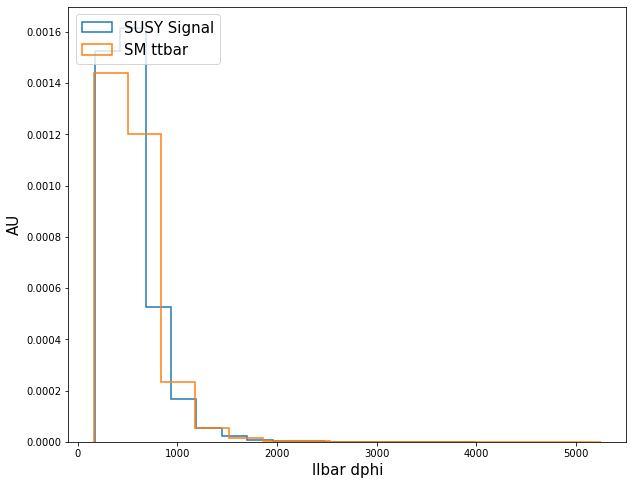

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(SUSY_ST, bins=15, density=True, histtype='step', label='SUSY Signal'   , linewidth=1.5, weights=Rw)
ax.hist(tt_ST  , bins=15, density=True, histtype='step', label='SM ttbar'      , linewidth=1.5)
#ax.set_xlim(0,600)

plt.xlabel('llbar dphi',  fontsize=15)
plt.ylabel('AU',  fontsize=15)
plt.legend(loc='upper left', fontsize=15)

In [2]:
sig_df = pd.read_pickle('SUSY_Mstop_175_mchi_7_5.pkl')
bkg_df = pd.read_pickle('ttbar.pkl')

In [5]:
bkg_df

,lepton_pt,lepton_eta,lepton_phi,sublepton_pt,sublepton_eta,sublepton_phi,ljet_pt,ljet_eta,ljet_phi,sljet_pt,sljet_eta,sljet_phi,llbar_dphi,llbar_deta,bbbar_dphi,bbbar_deta,MET,HT,ST
0,91.973358,-0.165681,-2.166260,23.187229,0.085386,-3.032371,154.690872,-0.527960,-0.794251,43.719803,0.906506,2.198710,0.866112,0.251068,2.992960,1.434467,40.877388,445.069183,565.853149
1,112.816429,0.798967,1.240929,44.290203,-0.105793,2.283712,75.248734,0.043351,-0.369035,57.951077,-0.132834,-1.351904,1.042783,0.904760,0.982869,0.176184,75.788750,357.723389,522.605225
2,43.987228,0.130620,2.637040,26.688267,-0.433511,-1.436051,64.864456,-1.168390,0.103488,51.536343,-1.005278,-0.836222,2.210095,0.564131,0.939710,0.163111,82.052475,211.170166,298.336426
3,67.326279,1.092385,-2.250801,62.540646,-1.381781,0.497019,124.907982,-1.169149,1.556577,56.729343,1.769381,2.979599,2.747819,2.474166,1.423022,2.938530,111.658691,354.078491,486.662292
4,68.052658,-1.328926,1.964946,44.179405,1.569256,0.235584,115.362259,1.195589,-0.541491,96.313278,-1.955245,-2.321472,1.729362,2.898182,1.779982,3.150834,305.180023,673.765198,804.066162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507872,59.327633,0.705557,0.988221,21.853622,-0.892421,2.023611,109.190163,0.662392,-0.997995,44.064552,1.586257,-1.930069,1.035390,1.597978,0.932074,0.923865,163.576767,324.711914,411.402924
1507873,32.163353,-1.842577,2.560833,29.970222,0.418093,-0.396972,84.472366,1.439341,0.019866,68.500420,-1.986389,0.812436,2.957805,2.260670,0.792570,3.425731,167.524246,234.381683,303.679901
1507874,38.886181,2.329492,1.033410,22.030453,1.662360,-0.107871,109.205093,0.656229,0.192320,66.863548,1.826849,-1.537633,1.141281,0.667132,1.729953,1.170620,132.210342,385.109467,461.035980
1507875,29.418436,-1.345814,-2.108402,25.852903,0.527760,-1.015938,60.789394,-0.364515,1.080870,41.894859,0.118325,0.430621,1.092464,1.873574,0.650249,0.482840,164.532532,232.169907,321.924072


In [33]:
# Set both to equal sizes 
# Reducing the bkg dataframe size

sig_df = sig_df[1:30000]
bkg_df = bkg_df[1:30000]

# Standardize
# It was originally just subtracting bkg mean from both,
# not sure how much sense that makes

sig_mean = sig_df.mean()
sig_std  = sig_df.std()

bkg_mean = bkg_df.mean()
bkg_std  = bkg_df.std()

sig_df = (sig_df - sig_mean)/ sig_std
bkg_df = (bkg_df - bkg_mean)/ bkg_std

signal = sig_df.values
bkg    = bkg_df.values

sig_label = np.ones(len(signal))
bkg_label = np.zeros(len(bkg))

data      = np.concatenate((signal,bkg))
label     = np.concatenate((sig_label,bkg_label))

In [11]:
sig_df.head()

,lepton_pt,lepton_eta,lepton_phi,sublepton_pt,sublepton_eta,sublepton_phi,ljet_pt,ljet_eta,ljet_phi,sljet_pt,sljet_eta,sljet_phi,llbar_dphi,llbar_deta,bbbar_dphi,bbbar_deta,MET,HT,ST
1,-0.226459,-0.422978,0.586596,0.644638,-0.804151,-0.746702,-0.906803,-0.572635,-1.535667,-0.940220,-0.708915,1.690162,0.578417,-0.674917,-1.680283,-1.133554,-0.408006,-0.618504,-0.530412
2,0.116944,0.443398,-0.249134,0.224349,0.191142,1.473955,-0.665528,-1.095614,1.347178,-0.595575,1.426476,-1.150241,1.428510,-0.963548,-0.160683,1.962055,-1.346413,-0.681174,-0.425029
3,-0.910908,1.892970,0.813749,-0.641894,0.563081,1.706551,0.868134,0.882770,0.999111,0.542321,-0.297877,-0.899572,-0.268188,0.644929,1.076221,0.212280,1.120513,-0.008095,-0.119438
4,-0.336551,0.757170,0.719448,-0.228479,-0.468468,-0.686654,0.136765,-0.259287,-0.450191,1.267324,-0.337745,-1.530542,0.729274,0.581440,0.035806,-1.217559,0.311636,-0.296763,-0.363830
5,0.257249,-0.977354,0.755167,-0.247704,-0.631730,1.192150,-0.853468,0.709703,-0.850041,-0.566412,-0.962942,-0.716026,-1.216884,-0.899645,-1.901878,0.866989,-1.023600,-0.741258,-0.621529


In [12]:
bkg_df.head()

,lepton_pt,lepton_eta,lepton_phi,sublepton_pt,sublepton_eta,sublepton_phi,ljet_pt,ljet_eta,ljet_phi,sljet_pt,sljet_eta,sljet_phi,llbar_dphi,llbar_deta,bbbar_dphi,bbbar_deta,MET,HT,ST
1,0.817688,0.792882,0.678905,0.126669,-0.023938,1.256178,-0.621920,0.060834,-0.214625,-0.366678,-0.082632,-0.740334,-0.862468,-0.190750,-1.062007,-1.161411,-0.134753,-0.328456,-0.159431
2,-0.746215,0.186552,1.446818,-0.657056,-0.310968,-0.793889,-0.756518,-1.036646,0.045977,-0.519664,-0.838289,-0.455651,0.459757,-0.630681,-1.111512,-1.176735,-0.013510,-1.057100,-1.089148
3,-0.215916,1.059074,-1.241678,0.939269,-1.141504,0.271481,0.021746,-1.037333,0.847374,-0.395815,1.564948,1.650870,1.068842,1.836181,-0.557137,2.076439,0.559558,-0.346578,-0.308434
4,-0.199412,-1.137562,1.077141,0.121736,1.443143,0.127397,-0.101982,1.104422,-0.309737,0.548223,-1.661091,-1.275583,-0.084774,2.383809,-0.147693,2.325288,4.305425,1.242862,1.007378
5,-0.776968,1.925352,0.468063,-0.630008,0.931602,1.379937,-0.245068,0.392742,1.239417,-0.737708,0.215893,-0.008222,-0.173919,0.012416,0.440938,-1.135856,0.294072,-0.818647,-0.906535


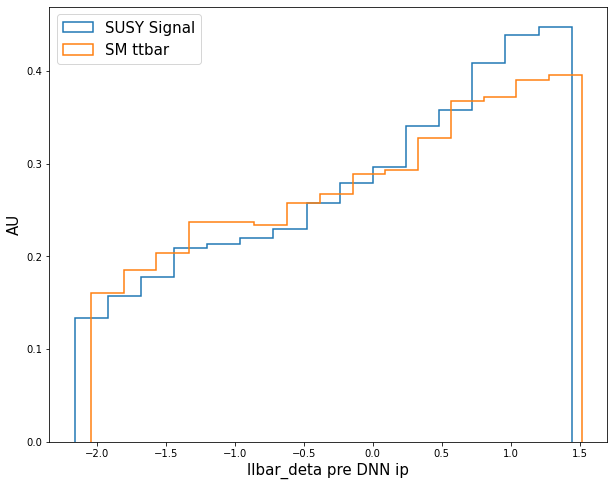

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(sig_df['llbar_dphi'], bins=15, density=True, histtype='step', label='SUSY Signal'   , linewidth=1.5)
ax.hist(bkg_df['llbar_dphi'], bins=15, density=True, histtype='step', label='SM ttbar'      , linewidth=1.5)

plt.xlabel('llbar_deta pre DNN ip',  fontsize=15)
plt.ylabel('AU',  fontsize=15)
plt.legend(loc='upper left', fontsize=15)

In [34]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle=True)
skf.get_n_splits(data, label)
skf.split(data, label)

<generator object _BaseKFold.split at 0x7fc1b3cfb430>

In [35]:
for train_index, test_index in skf.split(data, label):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = data[train_index], data[test_index]
    y_train, y_test = label[train_index], label[test_index]

TRAIN: [    1     2     4 ... 59991 59995 59997] TEST: [    0     3    10 ... 59993 59994 59996]
TRAIN: [    0     3    10 ... 59993 59994 59996] TEST: [    1     2     4 ... 59991 59995 59997]


In [36]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [17]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from skopt import gp_minimize

model = Sequential()
opt   = SGD(lr=0.1, decay=1e-6, momentum=0.05, nesterov=True)

model.add(Dense(100, input_dim = 19 ,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

2020-11-06 05:09:55.998035: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2020-11-06 05:09:56.030352: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc1b38119b0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-11-06 05:09:56.030371: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [18]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [37]:
hist = model.fit(x_train, y_train, batch_size=25, epochs=100,verbose=1, shuffle=True, validation_split=0.2,
                  callbacks=[EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='min'),
                  ModelCheckpoint(filepath='model.h5', verbose=0)])

Epoch 1/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1477 - accuracy: 0.9292 - val_loss: 0.1103 - val_accuracy: 0.9542
Epoch 2/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1333 - accuracy: 0.9373 - val_loss: 0.0772 - val_accuracy: 0.9642
Epoch 3/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1337 - accuracy: 0.9350 - val_loss: 0.1001 - val_accuracy: 0.9453
Epoch 4/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1367 - accuracy: 0.9357 - val_loss: 0.0853 - val_accuracy: 0.9590
Epoch 5/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1308 - accuracy: 0.9353 - val_loss: 0.0961 - val_accuracy: 0.9555
Epoch 6/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1259 - accuracy: 0.9386 - val_loss: 0.1241 - val_accuracy: 0.9407
Epoch 7/100
960/960 [==============================] - 2s 2ms/step - loss: 0.1297 - accuracy: 0.9371 - val_loss: 0.1016 - val_accuracy: 0.9478

In [20]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')

    plt.show()

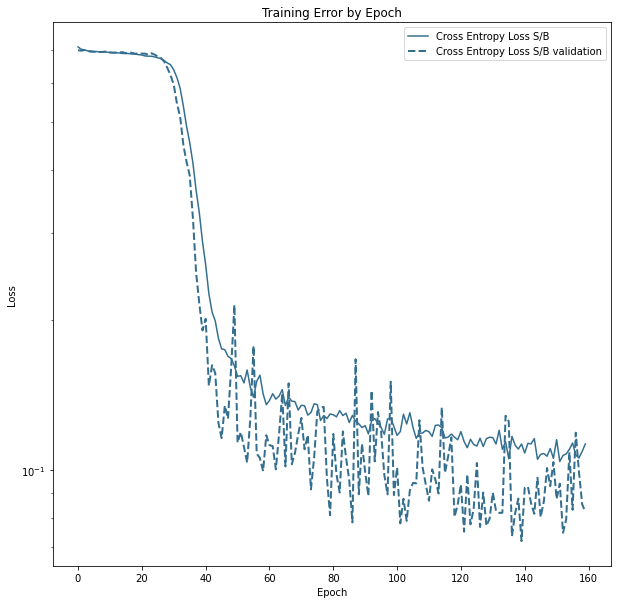

In [21]:
show_losses( [("Cross Entropy Loss S/B", hist)])

In [22]:
from sklearn.metrics import roc_curve
y_pred = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

In [23]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

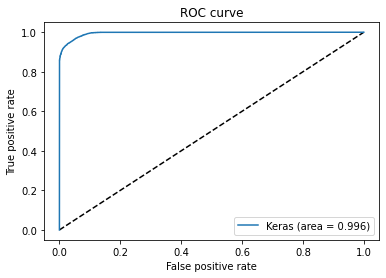

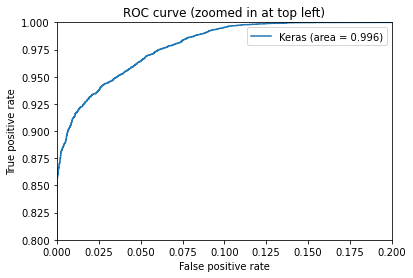

In [24]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [45]:
sig_df = pd.read_pickle('SUSY_Mstop_175_mchi_7_5.pkl')
bkg_df = pd.read_pickle('ttbar.pkl')

# Standardize
# It was originally just subtracting bkg mean from both,
# not sure how much sense that makes
sig_df = sig_df[30000:]
bkg_df = bkg_df[30000:]

sig_mean = sig_df.mean()
sig_std  = sig_df.std()

bkg_mean = bkg_df.mean()
bkg_std  = bkg_df.std()

sig_df = (sig_df - sig_mean)/ sig_std
bkg_df = (bkg_df - bkg_mean)/ bkg_std

In [46]:
bg_pred = model.predict(bkg_df) 
si_pred = model.predict(sig_df)

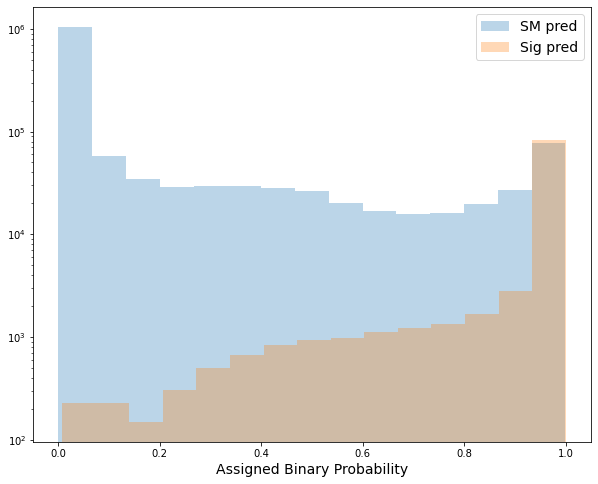

In [47]:
plt.figure(figsize=(10,8))
plt.hist(bg_pred, bins=15, alpha=0.3, label='SM pred')
plt.hist(si_pred, bins=15, alpha=0.3, label='Sig pred')
plt.yscale('log')
plt.xlabel('Assigned Binary Probability', fontsize=14)
plt.legend(loc='best', fontsize=14)